In [1]:
import os

import numpy as np
import pandas as pd
import re

from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def get_slope(xpts, ypts):
    """Function that returns the slope of a fitted line through (xpts, ypts)."""
    popt, pcov = curve_fit(lambda x, a, b: a*x+b, xpts, ypts)
    P = popt[0]
    Perr = np.sqrt(np.diag(pcov))[0]
    return P, Perr

In [3]:
path = "C:/Users/nicol/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU - Fysik og Nano/7. Semester/10316 Materials design with machine learning/magnetherm/Data/Cobalt Big"

df = pd.read_csv(path, header=2,sep='\t')

PermissionError: [Errno 13] Permission denied: 'C:/Users/nicol/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU - Fysik og Nano/7. Semester/10316 Materials design with machine learning/magnetherm/Data/Cobalt Big'

In [10]:
print(df)

       Time [s]  Current [A]  Voltage [V]  T0 [degC]   State
0      0.000027        0.001          0.0  21.929688  BEFORE
1      0.500089        0.000          0.0  21.945312  BEFORE
2      1.000097        0.000          0.0  21.984375  BEFORE
3      1.499973        0.000          0.0  21.929688  BEFORE
4      2.000094        0.000          0.0  21.859375  BEFORE
..          ...          ...          ...        ...     ...
473  237.501066        0.001          0.0  35.742188    WAIT
474  238.000105        0.001          0.0  35.578125    WAIT
475  238.499920        0.002          0.0  35.507812    WAIT
476  239.000178        0.001          0.0  35.687500    WAIT
477  239.499901        0.001          0.0  35.414062    WAIT

[478 rows x 5 columns]


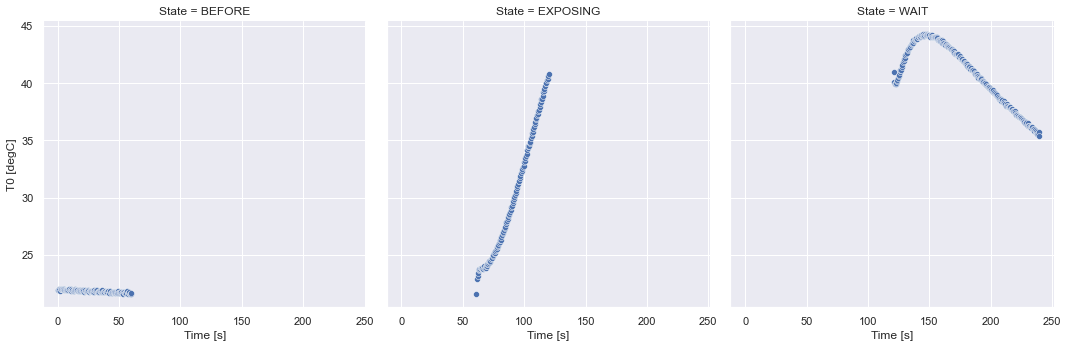

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.relplot(data=df, y="T0 [degC]", x="Time [s]",col="State")

In [38]:
Exp = df[df["State"]=="EXPOSING"]
Exp = Exp.iloc[5:]
Exp["T0 [degC]"] = Exp["T0 [degC]"]-Exp["T0 [degC]"][126]
Exp["Time [s]"] = Exp["Time [s]"]-Exp["Time [s]"][126]
print(Exp)

      Time [s]  Current [A]  Voltage [V]  T0 [degC]     State
126   0.000000       27.168       38.014   0.000000  EXPOSING
127   0.500161       27.166       38.062   0.023438  EXPOSING
128   1.000145       27.166       38.091   0.054688  EXPOSING
129   1.500174       27.165       38.118   0.078125  EXPOSING
130   2.000024       27.166       38.146   0.078125  EXPOSING
..         ...          ...          ...        ...       ...
235  54.500164       27.142       38.727  16.257812  EXPOSING
236  55.000113       27.143       38.723  16.507812  EXPOSING
237  55.500160       27.143       38.725  16.601562  EXPOSING
238  56.000056       27.143       38.726  16.812500  EXPOSING
239  56.500148       27.143       38.733  17.007812  EXPOSING

[114 rows x 5 columns]


In [111]:
def f(t,L):
    T_TC = (-1.4*np.exp(-0.03870890949*t)*L + 22.76083878*np.exp(-t*L/420) + 1.4*L - 22.76083878)/((0.7*L - 11.38041939)*L)
    return T_TC

In [114]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f,Exp["Time [s]"],Exp["T0 [degC]"])
print(popt)

[-61.47940013]


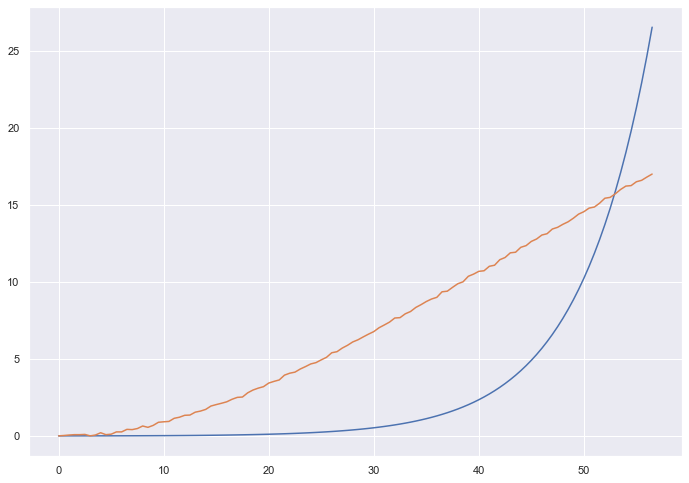

In [116]:
t_s = Exp["Time [s]"]
T_TC = f(t_s,popt)
plt.plot(t_s,T_TC)
plt.plot(t_s,Exp["T0 [degC]"])
plt.show()

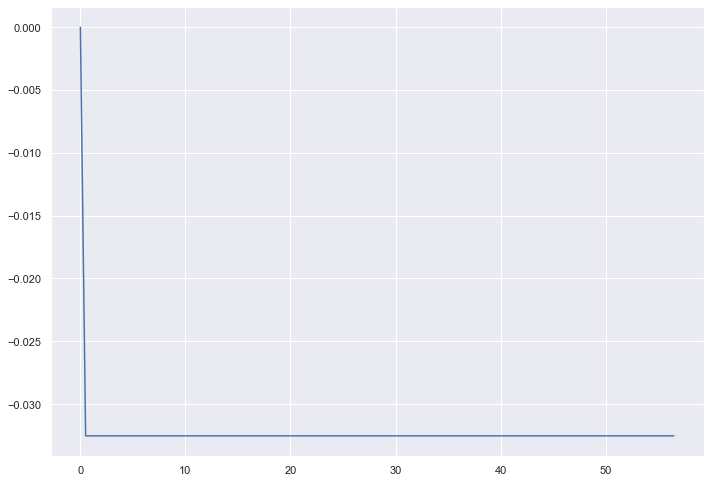

In [117]:
P=2
L=popt
Cs = 0.140085
t_s = Exp["Time [s]"]
T_s= P*(1 - np.exp(t_s*L/Cs))/L
plt.plot(t_s,T_s)

Spørgmål til Thomas:
- Er delta T fra sample til sensor eller vv.
- Hvorfor bliver L negativ?
- C definitioner for de forskellige ting
- Indre radius af rør
- Endelige T_s bliver negativ...
- Curve passer ret ringe